# Trabalhando com planilhas do Excel

In [67]:
# Importando as bibliotecas

import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import random as rd

In [2]:
# Lendo os arquivos

df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [3]:
# Juntando todos os arquivos

df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
# Mostrando as 5 primeiras linhas

df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
# Mostrando as 5 ultimas linhas

df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
# Mostrando a estrutura do datafreme

df.shape

(894, 5)

In [7]:
# Mostrando o tipo de dados de cada coluna

df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
# Alterando o tipo de dados de uma coluna espesifica

df['LojaID'] = df['LojaID'].astype('object')

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


## Tratando valores faltantes

In [11]:
# Consultado valores nulos nas linhas

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
# Substituido os valores nulos pela media

df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [13]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
df['Vendas'].mean()

122.61180089485438

In [15]:
# Mudando valores nulos por zero

df['Vendas'].fillna(0, inplace=True)

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
# Apagando as linhas nulas anas em uma colunas especifica

df.dropna(subset=['Vendas'], inplace=True)

In [18]:
# Removendo linhas com valores faltantes

df.dropna(how='all', inplace=True)

In [19]:
# Criando uma nova tabela com a receita

df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [20]:
# Retornando a maior receira

df['Receita'].max()

3544.0

In [21]:
# Menor receira

df['Receita'].min()

3.34

In [22]:
# Maiores resceitas

df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [23]:
# Piores receitas

df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [24]:
# Retorna a receira de acordo com a cidade

df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [25]:
# Odenando o Cunjunto de dados

df_orde = df.sort_values('Receita', ascending=False)

In [26]:
df_orde

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.00,853,4,3544.00
55,Natal,2019-01-08,859.00,854,4,3436.00
51,Natal,2018-01-21,859.00,852,4,3436.00
30,Natal,2018-10-02,856.00,853,4,3424.00
41,Natal,2018-05-20,835.00,852,4,3340.00
...,...,...,...,...,...,...
95,Natal,2019-01-02,5.13,1035,1,5.13
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
65,Recife,2019-01-01,4.01,981,1,4.01


## Trabalhando com datas

In [27]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [28]:
# Transformando a coluna de data em tipo inteiro

df['Data'] = df['Data'].astype('int64')

In [29]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [30]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,1514764800000000000,142.00,1520,1,142.00
1,Aracaju,1514764800000000000,14.21,1522,6,85.26
2,Aracaju,1514764800000000000,71.55,1520,1,71.55
3,Aracaju,1514764800000000000,3.01,1521,7,21.07
4,Aracaju,1514764800000000000,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,1546473600000000000,41.84,1034,1,41.84
236,Salvador,1546473600000000000,126.29,1035,3,378.87
237,Salvador,1546473600000000000,38.06,1036,3,114.18
238,Salvador,1546473600000000000,139.64,1035,1,139.64


In [31]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [32]:
# Trasnformando a coluna data no tipo data
df['Data'] = pd.to_datetime(df['Data'])

In [33]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [34]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [35]:
# Qual a receita por ano?

df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
# Criando uma coluna com o ano

df['Ano_Venda'] = df['Data'].dt.year

In [37]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019


In [38]:
# Criando uma planilha como mês e dia de venda

df['Mês_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [39]:
# Retorna os campos de forma aleatoria

df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda
3,Natal,2019-01-07,271.00,854,3,813.00,2019,1,7
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,2019,1,1
180,Salvador,2019-01-02,116.63,1035,2,233.26,2019,1,2
149,Natal,2019-01-02,22.38,1034,3,67.14,2019,1,2
28,Fortaleza,2019-01-01,34.88,1004,3,104.64,2019,1,1
154,Salvador,2019-01-02,9.58,1037,1,9.58,2019,1,2
195,Salvador,2019-01-02,44.89,1036,3,134.67,2019,1,2
127,Natal,2019-01-02,240.61,1035,3,721.83,2019,1,2
116,Natal,2019-01-02,41.78,1034,3,125.34,2019,1,2
37,Natal,2018-10-03,726.00,852,2,1452.00,2018,10,3


In [40]:
# Rotornando a data mais antiga

df['Data'].min() 

Timestamp('2018-01-01 00:00:00')

In [41]:
# Calculando a diferença de dias entre duas datas

df['Diferença_Dias'] = df['Data'] - df['Data'].min()

In [42]:
df.sample(150)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias
211,Salvador,2019-01-02,141.05,1035,3,423.15,2019,1,2,366 days
45,Recife,2019-01-01,15.90,983,8,127.20,2019,1,1,365 days
86,Natal,2019-01-02,156.47,1037,3,469.41,2019,1,2,366 days
80,Aracaju,2018-01-01,121.77,1523,3,365.31,2018,1,1,0 days
30,Recife,2019-01-01,12.35,980,5,61.75,2019,1,1,365 days
...,...,...,...,...,...,...,...,...,...,...
30,Aracaju,2018-01-01,119.21,1520,8,953.68,2018,1,1,0 days
104,Natal,2019-01-02,188.79,1036,3,566.37,2019,1,2,366 days
129,Salvador,2019-03-02,125.66,1037,1,125.66,2019,3,2,425 days
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019,2,13,408 days


In [43]:
# Criando uma coluna como trimestre

df['Trimestre'] = df['Data'].dt.quarter

In [44]:
df.sample(100)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias,Trimestre
161,Salvador,2019-01-02,5.80,1036,1,5.80,2019,1,2,366 days,1
13,Natal,2018-09-12,458.00,852,4,1832.00,2018,9,12,254 days,3
224,Natal,2019-01-02,178.30,1035,3,534.90,2019,1,2,366 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2,397 days,1
112,Aracaju,2018-01-01,4.52,1522,8,36.16,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...
57,Aracaju,2018-01-01,23.49,1520,7,164.43,2018,1,1,0 days,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,2019,3,2,425 days,1
194,Natal,2019-01-02,156.47,1035,1,156.47,2019,1,2,366 days,1
41,Recife,2019-02-13,157.78,981,4,631.12,2019,2,13,408 days,1


In [45]:
# Filtrando as vendas do mês de março do ano de 2019

vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [46]:
vendas_marco_19.sample(50)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias,Trimestre
112,Recife,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,2019,3,2,425 days,1
111,Salvador,2019-03-02,147.35,1037,2,294.70,2019,3,2,425 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1


## Visualização de Dados

In [47]:
# Fazendo uma contagem de lojas e a quantidade de vendas

df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

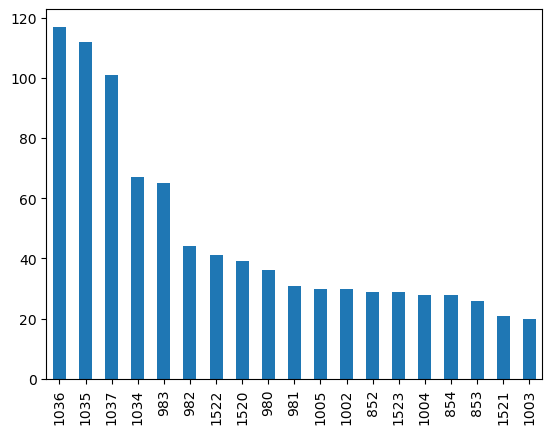

In [48]:
# Graficos de barras vertical

df['LojaID'].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

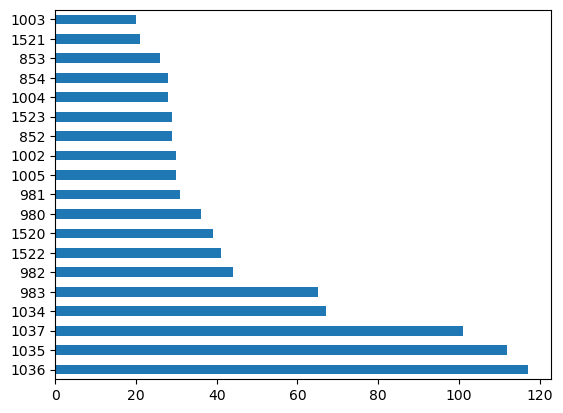

In [49]:
# Grafico Barras Horizontais 

df['LojaID'].value_counts(ascending=False).plot.barh()

<AxesSubplot:>

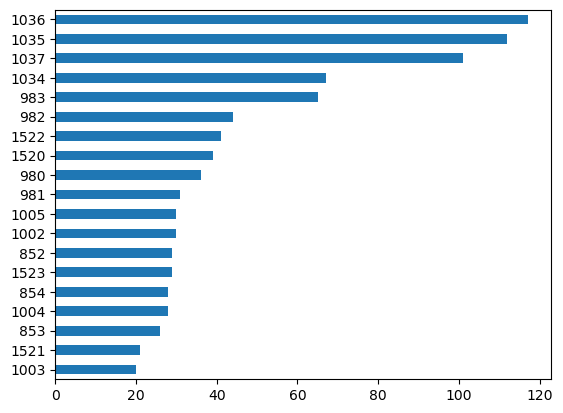

In [50]:
# Ordenando do maior para o menos

df['LojaID'].value_counts(ascending=True).plot.barh()

<AxesSubplot:>

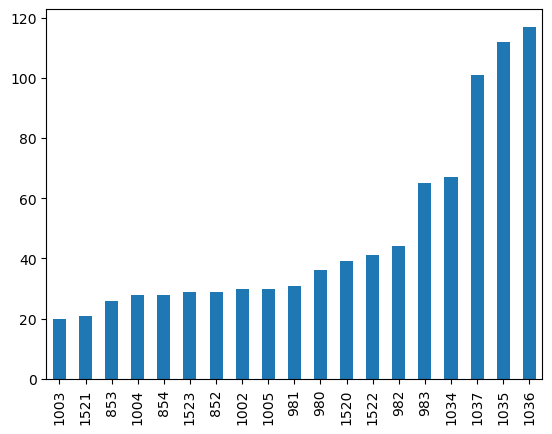

In [51]:
df['LojaID'].value_counts(ascending=True).plot.bar()

<AxesSubplot:ylabel='Receita'>

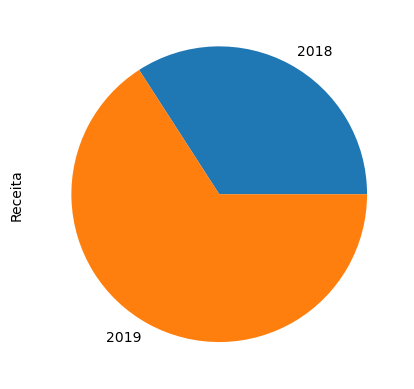

In [52]:
# Grafico de Pizza

df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [53]:
# Total de vendas por cidade

df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

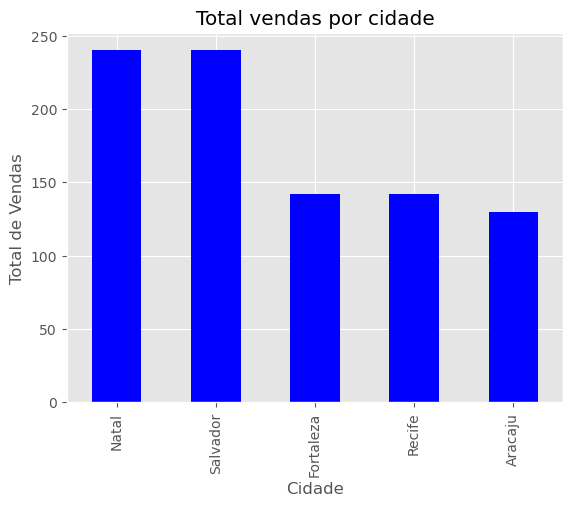

In [83]:
# Alterando o estilo do grafico e definindo cores a cada barra aleatoria

plt.style.use('ggplot')

# Adicionando titulo e colocando o nome dos eixos e defindo uma cor

df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color=(rd.choice([
                                                                                        'red',
                                                                                        'green',
                                                                                        'pink',
                                                                                        'blue',
                                                                                        'Gray',
                                                                                        'Purple'
                                                                                ]
                                                                    )
                                                    )
                                )
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')


In [78]:
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias,Trimestre
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1


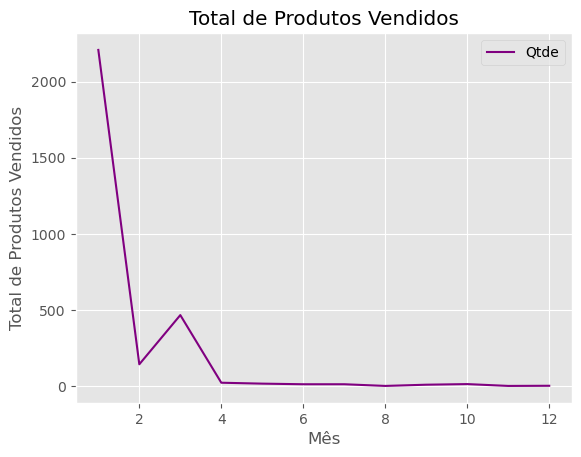

In [86]:
# Grafico de linhas

df.groupby(df['Mês_Venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos',color=(rd.choice([
                                                                                        'red',
                                                                                        'green',
                                                                                        'pink',
                                                                                        'blue',
                                                                                        'Gray',
                                                                                        'Purple'
                                                                                    ]
                                                                        )
                                                     )
                                     )
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend()

In [88]:
# Motrando todas as vendas de acordo com o mês

df.groupby(df['Mês_Venda'])['Qtde'].sum()

Mês_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [92]:
# Selecionando apenas as vendas de 2019

df_2019 = df[df['Ano_Venda'] == 2019]

In [94]:
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias,Trimestre
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1


(Text(0.5, 0, 'Mês'),
 Text(0, 0.5, 'Total de Produtos Vendidos'),
 <matplotlib.legend.Legend at 0x21ae105f580>)

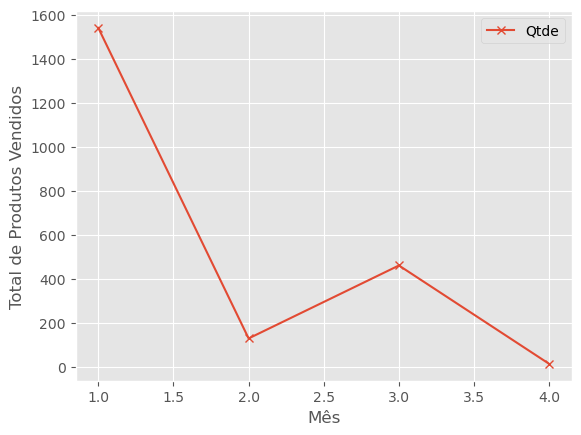

In [104]:
# Gráfico de linha - total de vendas por Mês

df_2019.groupby(df_2019['Mês_Venda'])['Qtde'].sum().plot(marker = 'x')
plt.xlabel('Mês'), plt.ylabel('Total de Produtos Vendidos'), plt.legend()

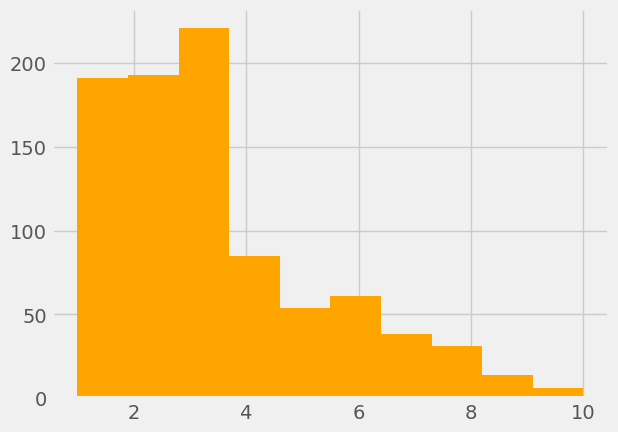

In [122]:
# Gráfico de histograma

plt.hist(df['Qtde'], color = 'orange');

Text(0, 0.5, 'Quantidade de venda')

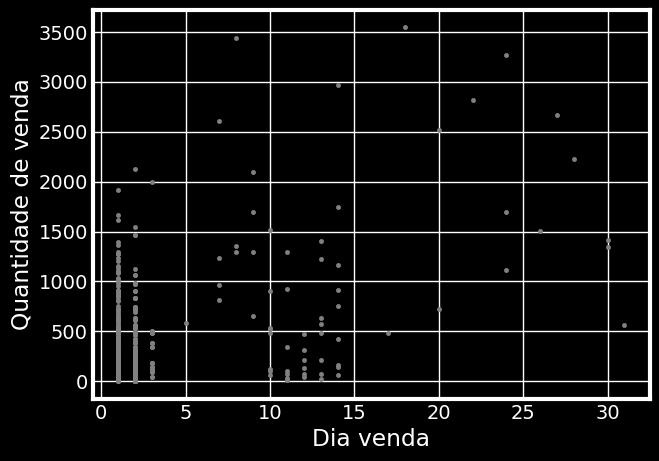

In [133]:
# Gráfico de diposersão

plt.style.use('dark_background')
plt.scatter(x = df_2019['Dia_Venda'], y = df_2019['Receita'], color = 'gray', marker='.');
plt.xlabel('Dia venda', color = 'white')
plt.ylabel('Quantidade de venda', color = 'white')

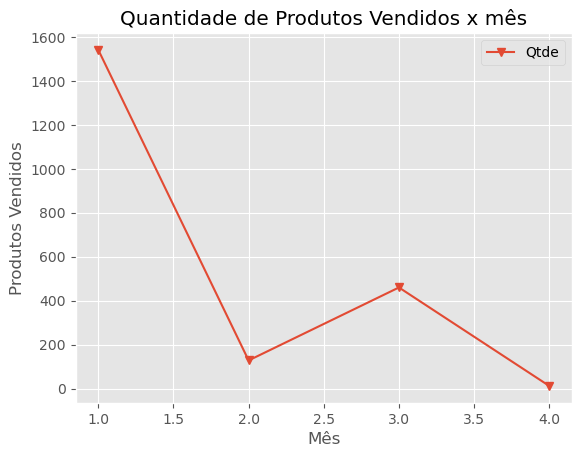

In [141]:
# Salvando dados em PNG

plt.style.use('ggplot')
df_2019.groupby(df_2019['Mês_Venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de Produtos Vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Produtos Vendidos')
plt.legend()
plt.savefig('Grafico Mês x Qdte')